In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = r"D:\\Codes\\Machine Learning\\FIFA Player Stats Analysis\\Fifa 23 Players Data.csv"  # Raw string to avoid escape sequences
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify loading
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("Dataset Summary Statistics:")
print(data.describe())

Dataset Summary Statistics:
            Overall     Potential  Value(in Euro)           Age  \
count  18539.000000  18539.000000    1.853900e+04  18539.000000   
mean      65.852042     71.016668    2.875461e+06     25.240412   
std        6.788353      6.192866    7.635129e+06      4.718163   
min       47.000000     48.000000    0.000000e+00     16.000000   
25%       62.000000     67.000000    4.750000e+05     21.000000   
50%       66.000000     71.000000    1.000000e+06     25.000000   
75%       70.000000     75.000000    2.000000e+06     29.000000   
max       91.000000     95.000000    1.905000e+08     44.000000   

       Height(in cm)  Weight(in kg)    TotalStats     BaseStats  \
count   18539.000000   18539.000000  18539.000000  18539.000000   
mean      181.550839      75.173904   1602.114569    357.946221   
std         6.858097       7.013593    273.160237     39.628259   
min       155.000000      49.000000    759.000000    224.000000   
25%       177.000000      70.0000

In [4]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64


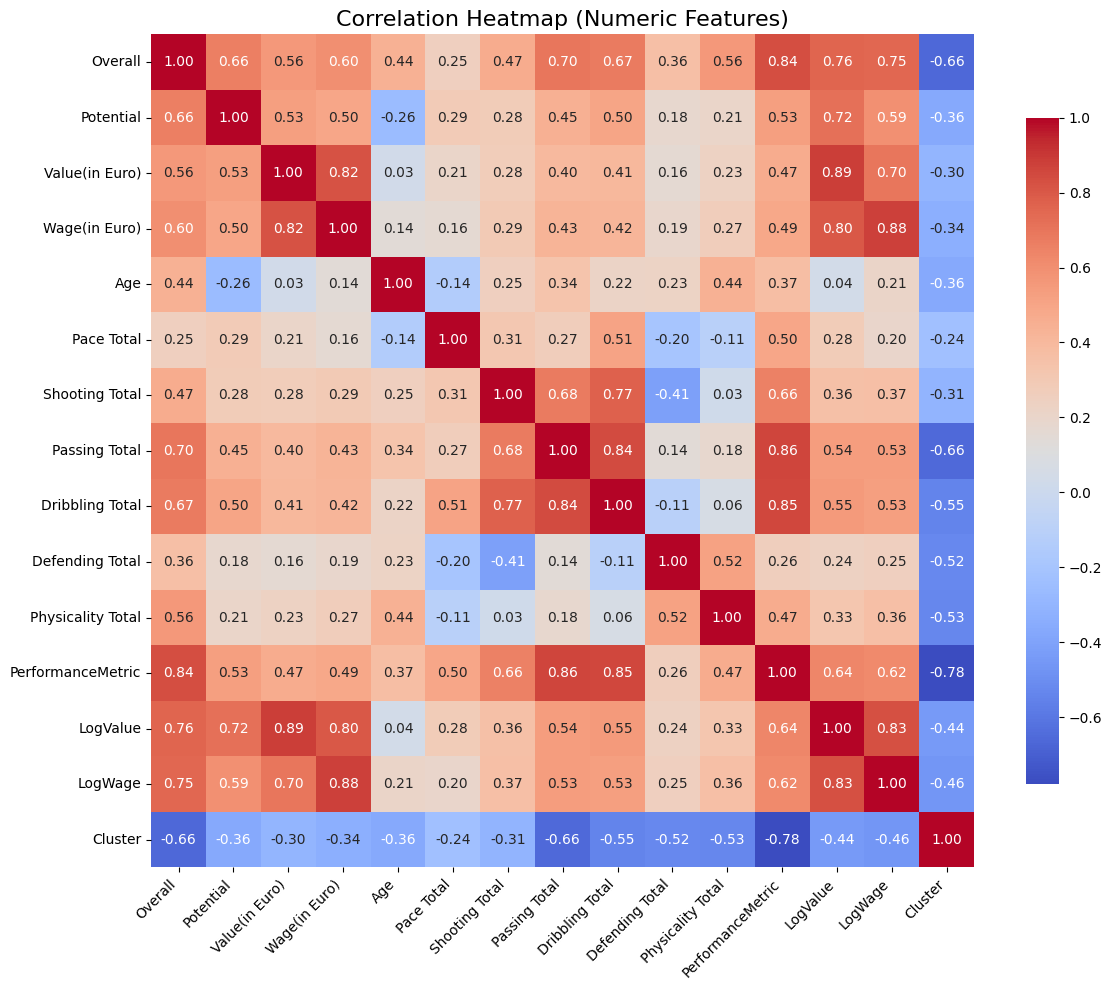

In [24]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap with improvements
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})

# Adjust the title and labels
plt.title('Correlation Heatmap (Numeric Features)', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

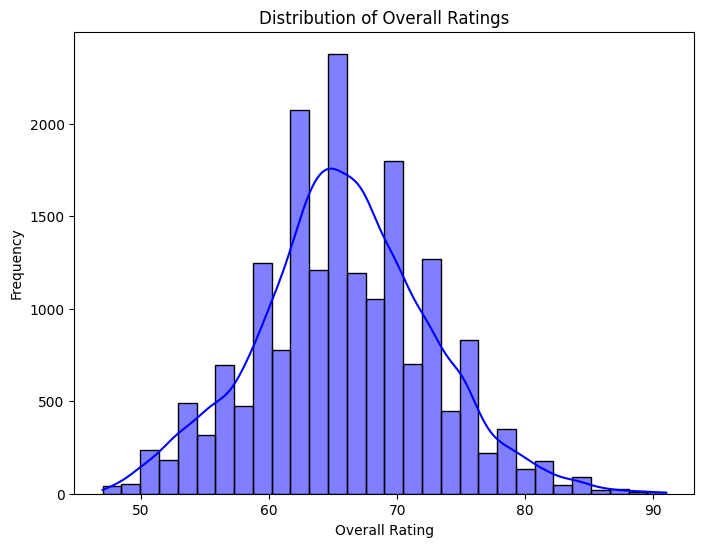

In [6]:
# Distribution of Overall Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Overall'], kde=True, bins=30, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

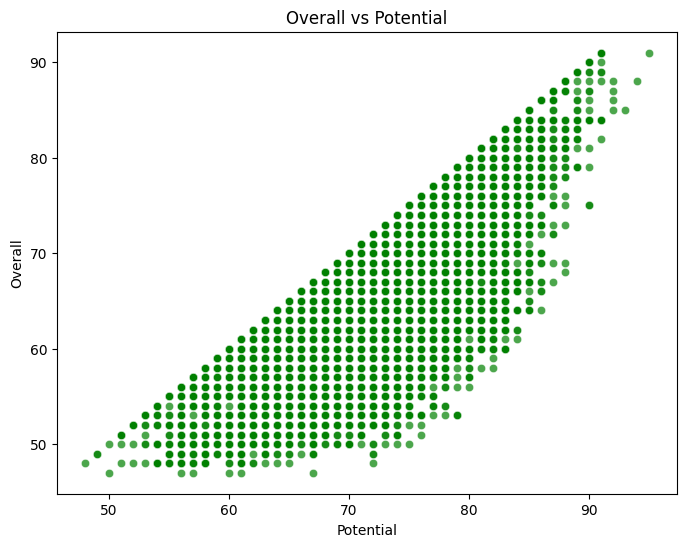

In [7]:
# Scatter plot for Overall vs Potential
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Potential', y='Overall', alpha=0.7, color='green')
plt.title('Overall vs Potential')
plt.xlabel('Potential')
plt.ylabel('Overall')
plt.show()

In [8]:
# Data Cleaning
# Selecting relevant columns for analysis
columns_of_interest = ['Overall', 'Potential', 'Value(in Euro)', 'Wage(in Euro)', 'Age', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']
data = data[columns_of_interest]

In [9]:
data = data[columns_of_interest].copy()  # Create a copy to avoid SettingWithCopyWarning
data.dropna(inplace=True)  # Drop missing values

In [10]:
# Data Preprocessing
# Scaling numeric features (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns = ['Value(in Euro)', 'Wage(in Euro)', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

In [11]:
# Feature Engineering
# Creating a performance metric
data['PerformanceMetric'] = data[['Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']].mean(axis=1)

In [12]:
# Transformation
# Log transformation for skewed features (e.g., Value and Wage)
data['LogValue'] = np.log1p(data['Value(in Euro)'])
data['LogWage'] = np.log1p(data['Wage(in Euro)'])

In [13]:
# Regression Analysis
# Splitting data into train and test sets
X = data[['Age', 'Potential', 'LogValue', 'LogWage', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']]
y = data['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define models to evaluate
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

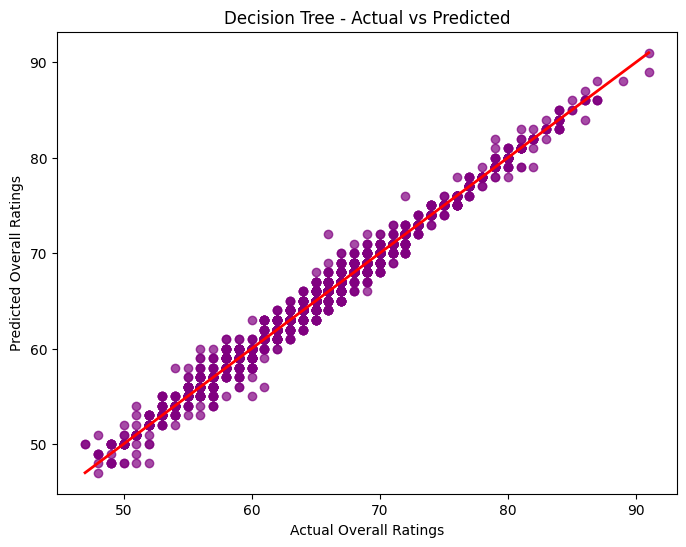

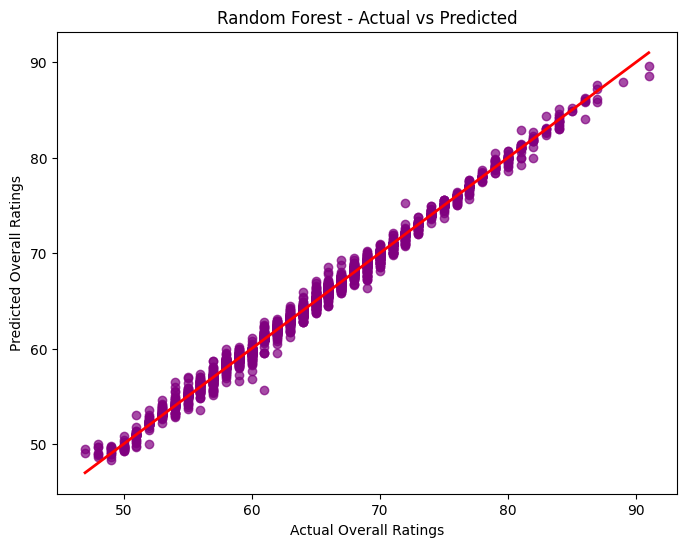

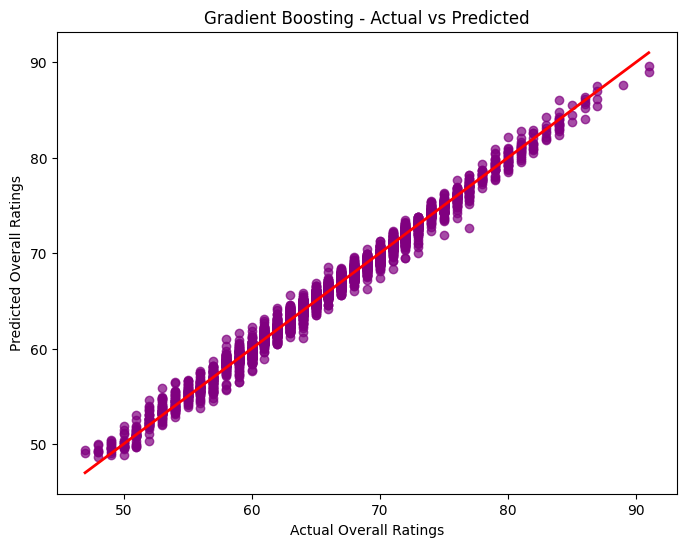

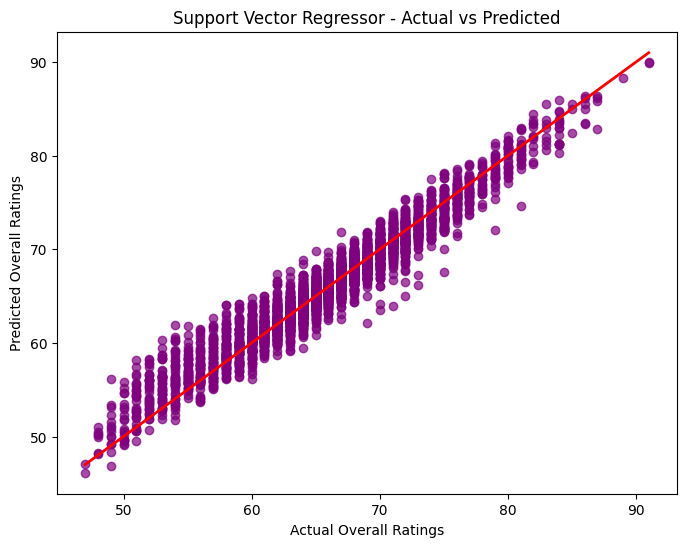

In [15]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results[name] = {"RMSE": rmse, "R2": r2}

    # Plot actual vs predicted for each model
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.7, color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual Overall Ratings')
    plt.ylabel('Predicted Overall Ratings')     
    plt.show()

In [16]:
print("\nModel Comparison:")
comparison_df = pd.DataFrame(results).T
print(comparison_df)


Model Comparison:
                              RMSE        R2
Decision Tree             0.667677  0.990139
Random Forest             0.467831  0.995159
Gradient Boosting         0.693500  0.989361
Support Vector Regressor  1.709763  0.935336


<Figure size 1000x600 with 0 Axes>

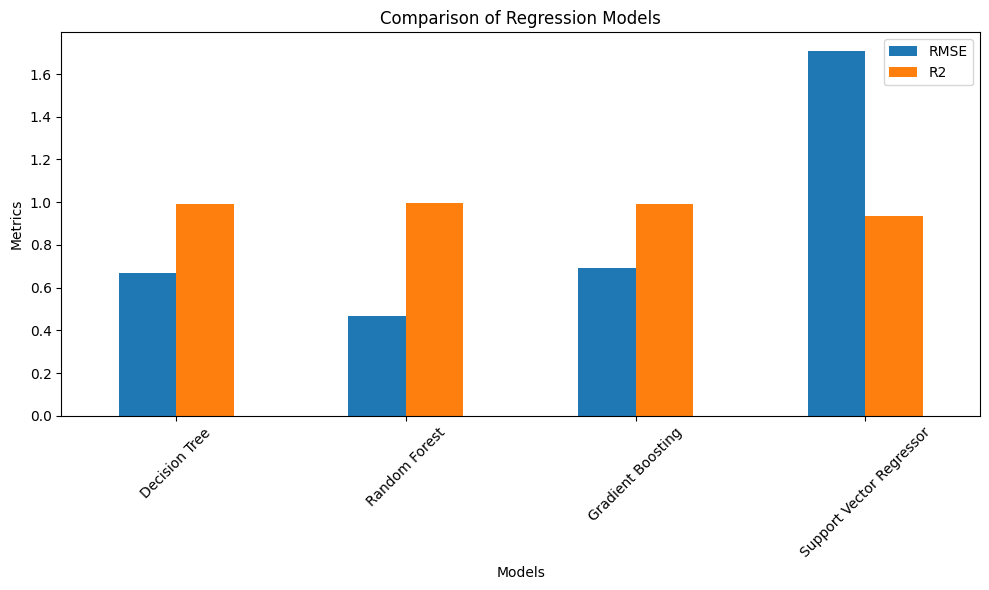

In [22]:
# Final comparison bar plot
plt.figure(figsize=(10, 6))
comparison_df[['RMSE', 'R2']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [18]:
# Clustering Analysis
# Selecting features for clustering
cluster_features = data[['Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']]

In [19]:
# Applying k-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(cluster_features)

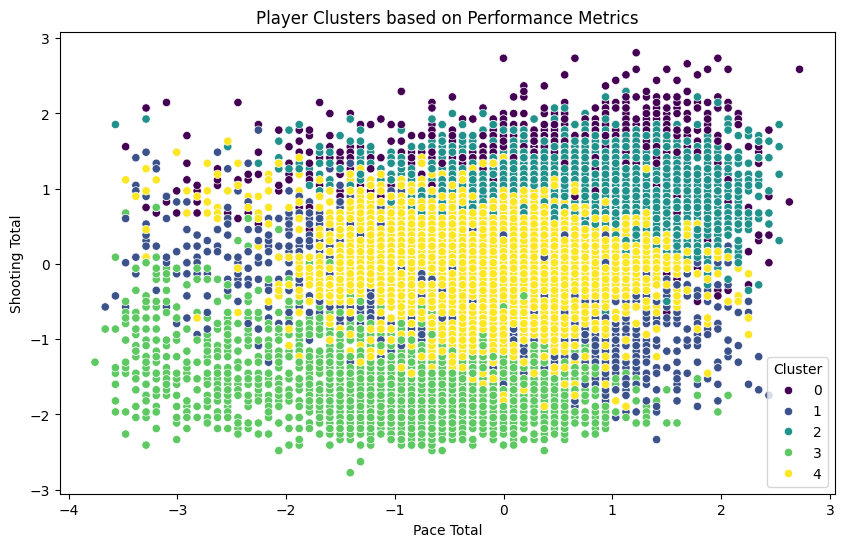

In [20]:
# Visualization
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Pace Total', y='Shooting Total', hue='Cluster', palette='viridis')
plt.title('Player Clusters based on Performance Metrics')
plt.xlabel('Pace Total')
plt.ylabel('Shooting Total')
plt.legend(title='Cluster')
plt.show()